# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | I'm so fraustrated. My fli...
1,✅ Trip Verified | We have sat on this plane fo...
2,Not Verified | British Airways stranding my w...
3,✅ Trip Verified | Although like many these d...
4,✅ Trip Verified | This flight was British Airw...
...,...
995,✅ Trip Verified | Malaga to London Heathrow ....
996,✅ Trip Verified | Sydney to Singapore. Extrem...
997,✅ Trip Verified | London Heathrow to Invernes...
998,Not Verified | Heathrow to Glasgow. Again fli...


In [6]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df_copy = df.copy()

df_copy['reviews'] = (
    df_copy['reviews'].str.replace(r'✅ Trip Verified|Not Verified', '', case=False, regex=True).str.replace(r'^\|', '', regex=True).str.strip()   
)
df_copy

,reviews
0,| I'm so fraustrated. My flight was cancelle...
1,| We have sat on this plane for an hour and fo...
2,| British Airways stranding my wife and I at ...
3,"| Although like many these days, I avoid BA ..."
4,| This flight was British Airways at its very ...
...,...
995,| Malaga to London Heathrow . A shambolic air...
996,| Sydney to Singapore. Extremely disappointed...
997,| London Heathrow to Inverness. Having previo...
998,| Heathrow to Glasgow. Again flight is delaye...


In [8]:

df_copy['reviews']= (df_copy['reviews'].str.replace(r'^\|', '', regex=True))  
df_copy

,reviews
0,I'm so fraustrated. My flight was cancelled...
1,We have sat on this plane for an hour and for...
2,British Airways stranding my wife and I at H...
3,"Although like many these days, I avoid BA o..."
4,This flight was British Airways at its very b...
...,...
995,Malaga to London Heathrow . A shambolic airl...
996,Sydney to Singapore. Extremely disappointed ...
997,London Heathrow to Inverness. Having previou...
998,Heathrow to Glasgow. Again flight is delayed...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('ggplot')

import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

In [10]:
l = df_copy['reviews'].iloc[999]
l

' A supremely awful experience from beginning to end. Flight to Vancouver delayed by 4 hours due to a plane defect that had been resolved the previous day but somehow no attempt made to make up the time in between. Only told once on board what the problem was. Delays at baggage reclaim meant I didn’t get out of Vancouver airport until after midnight (originally scheduled to arrive 6.55pm). This affected a camping trip, the booking for which could not be changed. Flight home marred by massive queues at baggage check in and on the plane, due to IT faults, none of which were communicated until we were seated on the plane and told they could not leave until passenger information could get through to the crew. Due to more IT faults the inflight entertainment was not working so nothing to watch for the 9 hour flight. Food was awful and we got a choice of one meal. Spent hours at Heathrow airport awaiting my flight home to Inverness only to be told by text one hour before departure that it wa

In [11]:
#df.dropna(inplace=True)
df_copy.isnull().sum()

reviews    0
dtype: int64

In [12]:
# Convert text to lowercase
df_copy['reviews'] = df_copy['reviews'].str.lower()
df_copy


,reviews
0,i'm so fraustrated. my flight was cancelled...
1,we have sat on this plane for an hour and for...
2,british airways stranding my wife and i at h...
3,"although like many these days, i avoid ba o..."
4,this flight was british airways at its very b...
...,...
995,malaga to london heathrow . a shambolic airl...
996,sydney to singapore. extremely disappointed ...
997,london heathrow to inverness. having previou...
998,heathrow to glasgow. again flight is delayed...


# nltk

In [39]:
review_example = df_copy['reviews'][1]
review_example

'sat plane hour forti five minut await takeoff due bad weather london. understand safety. fortun long layov delay affect me. howev mani other lucky. wait given one small bottl water one tini pack corn kernels. later food drink offer purchase. complaint. sit idl plane nearli two hour possibl miss connect flight can’t give us free bag chip coke? ask told no. british airway realli cheap money grubbing?'

In [42]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

token = nltk.word_tokenize(review_example)
token[:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bonas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bonas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


['sat', 'plane', 'hour', 'forti', 'five']

In [ ]:
# part of speech tag for each word

tagged = nltk.pos_tag(token)
tagged[:5]

[('sat', 'JJ'),
 ('plane', 'NN'),
 ('hour', 'NN'),
 ('forti', 'NN'),
 ('five', 'CD')]

## Step1: VADER seniment analysis

In [ ]:
# alternative
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bonas\AppData\Roaming\nltk_data...


In [ ]:
# alternative
sia.polarity_scores('i am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [47]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stop words (words Don't add meaning to sentence)
stop_words = set(stopwords.words('english'))
df_copy['reviews'] = df_copy['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_copy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews,review_length,sentiment
0,"i'm fraustrated. flight cancel last minute, en...",848,negative
1,sat plane hour forti five minut await takeoff ...,401,negative
2,british airway strand wife heathrow airport 2....,392,neutral
3,"although like mani days, avoid ba long haul lo...",352,negative
4,flight british airway best. flight attend outs...,183,positive
...,...,...,...
995,malaga london heathrow . shambol airline. rude...,358,negative
996,sydney singapore. extrem disappoint trip. unab...,280,negative
997,london heathrow inverness. previous written re...,743,negative
998,heathrow glasgow. flight delayed. it’ easier u...,231,positive


In [14]:
# Stemming
stemmer = PorterStemmer()
df_copy['reviews'] = df_copy['reviews'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_copy

,reviews
0,"i'm fraustrated. flight cancel last minute, en..."
1,sat plane hour forti five minut await takeoff ...
2,british airway strand wife heathrow airport 2....
3,"although like mani days, avoid ba long haul lo..."
4,flight british airway best. flight attend outs...
...,...
995,malaga london heathrow . shambol airline. rude...
996,sydney singapore. extrem disappoint trip. unab...
997,london heathrow inverness. previous written re...
998,heathrow glasgow. flight delayed. it’ easier u...


In [15]:
print(df_copy.describe())

                                                  reviews
count                                                1000
unique                                               1000
top     i'm fraustrated. flight cancel last minute, en...
freq                                                    1


 # EDA

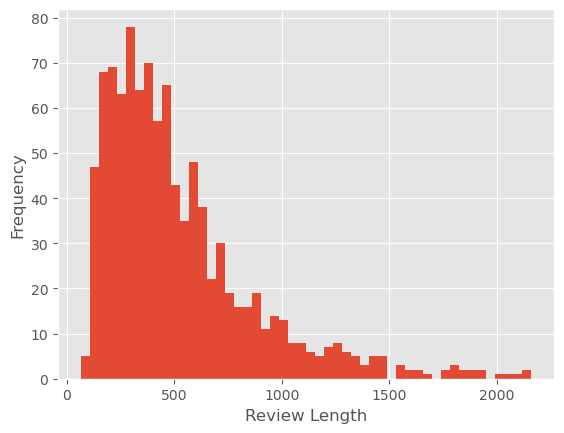

In [16]:
df_copy['review_length'] = df_copy['reviews'].apply(len)
plt.hist(df_copy['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

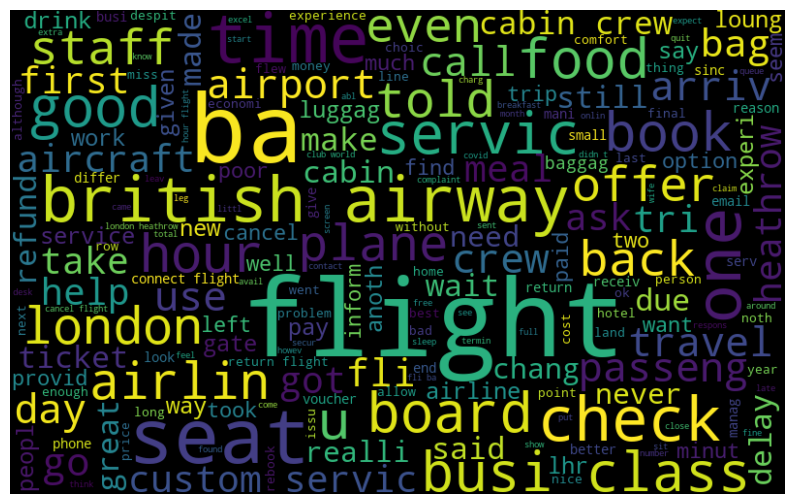

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_copy['reviews']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reviews'])
vectorizer

TfidfVectorizer()

In [19]:
from textblob import TextBlob

def sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df_copy['sentiment'] = df_copy['reviews'].apply(sentiment)

y = df_copy['sentiment']
df_copy

,reviews,review_length,sentiment
0,"i'm fraustrated. flight cancel last minute, en...",848,negative
1,sat plane hour forti five minut await takeoff ...,401,negative
2,british airway strand wife heathrow airport 2....,392,neutral
3,"although like mani days, avoid ba long haul lo...",352,negative
4,flight british airway best. flight attend outs...,183,positive
...,...,...,...
995,malaga london heathrow . shambol airline. rude...,358,negative
996,sydney singapore. extrem disappoint trip. unab...,280,negative
997,london heathrow inverness. previous written re...,743,negative
998,heathrow glasgow. flight delayed. it’ easier u...,231,positive


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model_clf = MultinomialNB()
model_clf.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred = model_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        77
     neutral       0.00      0.00      0.00         5
    positive       0.59      1.00      0.74       118

    accuracy                           0.59       200
   macro avg       0.20      0.33      0.25       200
weighted avg       0.35      0.59      0.44       200

[[  0   0  77]
 [  0   0   5]
 [  0   0 118]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your model, X_test, and y_test
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]  # Probability of positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

ValueError: multiclass format is not supported